In [1]:
#Ispired by https://shakasom.medium.com/routing-street-networks-find-your-way-with-python-9ba498147342 


In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import plotly_express as px
import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)

2021-12-29 14:15:53 Configured OSMnx 1.1.2
2021-12-29 14:15:53 HTTP response caching is on


In [6]:
def create_graph(loc, dist, transport_mode, loc_type="address"):
    """Transport mode = ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’"""
    if loc_type == "address":
            G = ox.graph_from_address(loc, dist=dist, network_type=transport_mode)
    elif loc_type == "points":
            G = ox.graph_from_point(loc, dist=dist, network_type=transport_mode )
    return G

2021-12-29 14:18:22 Retrieved response from cache file "cache/af3b5bdac2c3755a8d6094d88a2a32f3408e2ae8.json"
2021-12-29 14:18:22 Geocoded "Gothenburg" to (57.7072326, 11.9670171)
2021-12-29 14:18:22 Created bbox 2500 m from (57.7072326, 11.9670171): 57.72971560838732,57.68474959161267,12.00910075305032,11.924933446949678
2021-12-29 14:18:22 Projected GeoDataFrame to +proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-12-29 14:18:22 Projected GeoDataFrame to epsg:4326
2021-12-29 14:18:22 Projected GeoDataFrame to +proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-12-29 14:18:22 Projected GeoDataFrame to epsg:4326
2021-12-29 14:18:22 Requesting data within polygon from API in 1 request(s)
2021-12-29 14:18:22 Retrieved response from cache file "cache/f3acd63a233b8ec83ce8ddf935f427d46880a090.json"
2021-12-29 14:18:22 Got all network data within polygon from API in 1 request(s)
2021-12-29 14:18:22 Creating graph from downloaded OSM data..

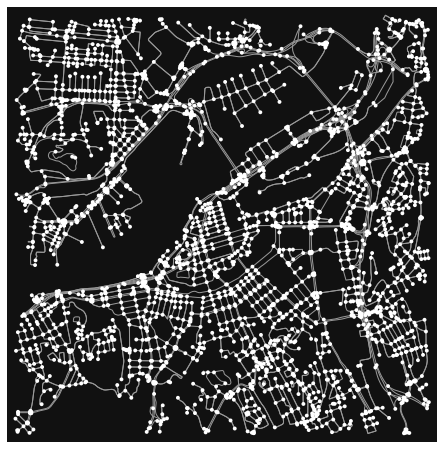

2021-12-29 14:18:27 Finished plotting the graph


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [10]:
G = create_graph("Gothenburg", 2500, "drive")
ox.plot_graph(G)

2021-12-29 14:22:19 Created edges GeoDataFrame from graph
2021-12-29 14:22:19 Created edges GeoDataFrame from graph
2021-12-29 14:22:19 Created nodes GeoDataFrame from graph


/Users/hakon/opt/anaconda3/envs/location-data-cleaner/lib/python3.10/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/hakon/opt/anaconda3/envs/location-data-cleaner/lib/python3.10/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


2021-12-29 14:22:19 Created nodes GeoDataFrame from graph
2021-12-29 14:22:19 Begin plotting the graph...
2021-12-29 14:22:20 Created edges GeoDataFrame from graph
2021-12-29 14:22:20 Finished plotting the graph


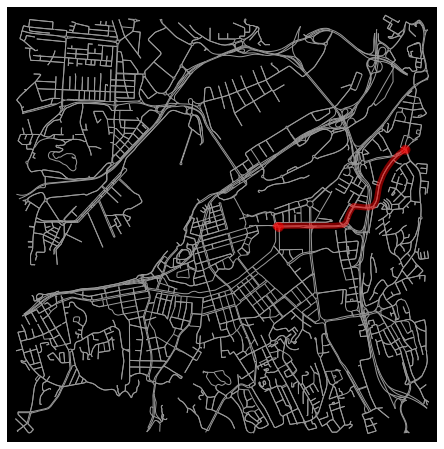

In [14]:
G = ox.add_edge_speeds(G) #Impute
G = ox.add_edge_travel_times(G) #Travel time
start = (57.715495, 12.004210)
end = (57.707166, 11.978388)
start_node = ox.get_nearest_node(G, start)
end_node = ox.get_nearest_node(G, end)
# Calculate the shortest path
route = nx.shortest_path(G, start_node, end_node, weight='travel_time')
#Plot the route and street networks
ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k');